In [60]:
# Import the machine learning libraries.
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [61]:
# Load the Boston house-prices dataset.
boston = load_boston()

In [62]:
boston

{'DESCR': ".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate p

In [63]:
# Split a dataset into X and y.
X = boston.data
y = boston.target

In [64]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [65]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [66]:
# Convert a Numpy array to a Pandas DataFrame.
df = pd.DataFrame(boston.data)
df.columns = boston.feature_names
print(df.shape)

(506, 13)


In [67]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [68]:
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88


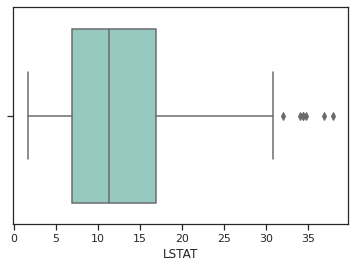

In [69]:
sns.boxplot(x=df['LSTAT'], palette="Set3")

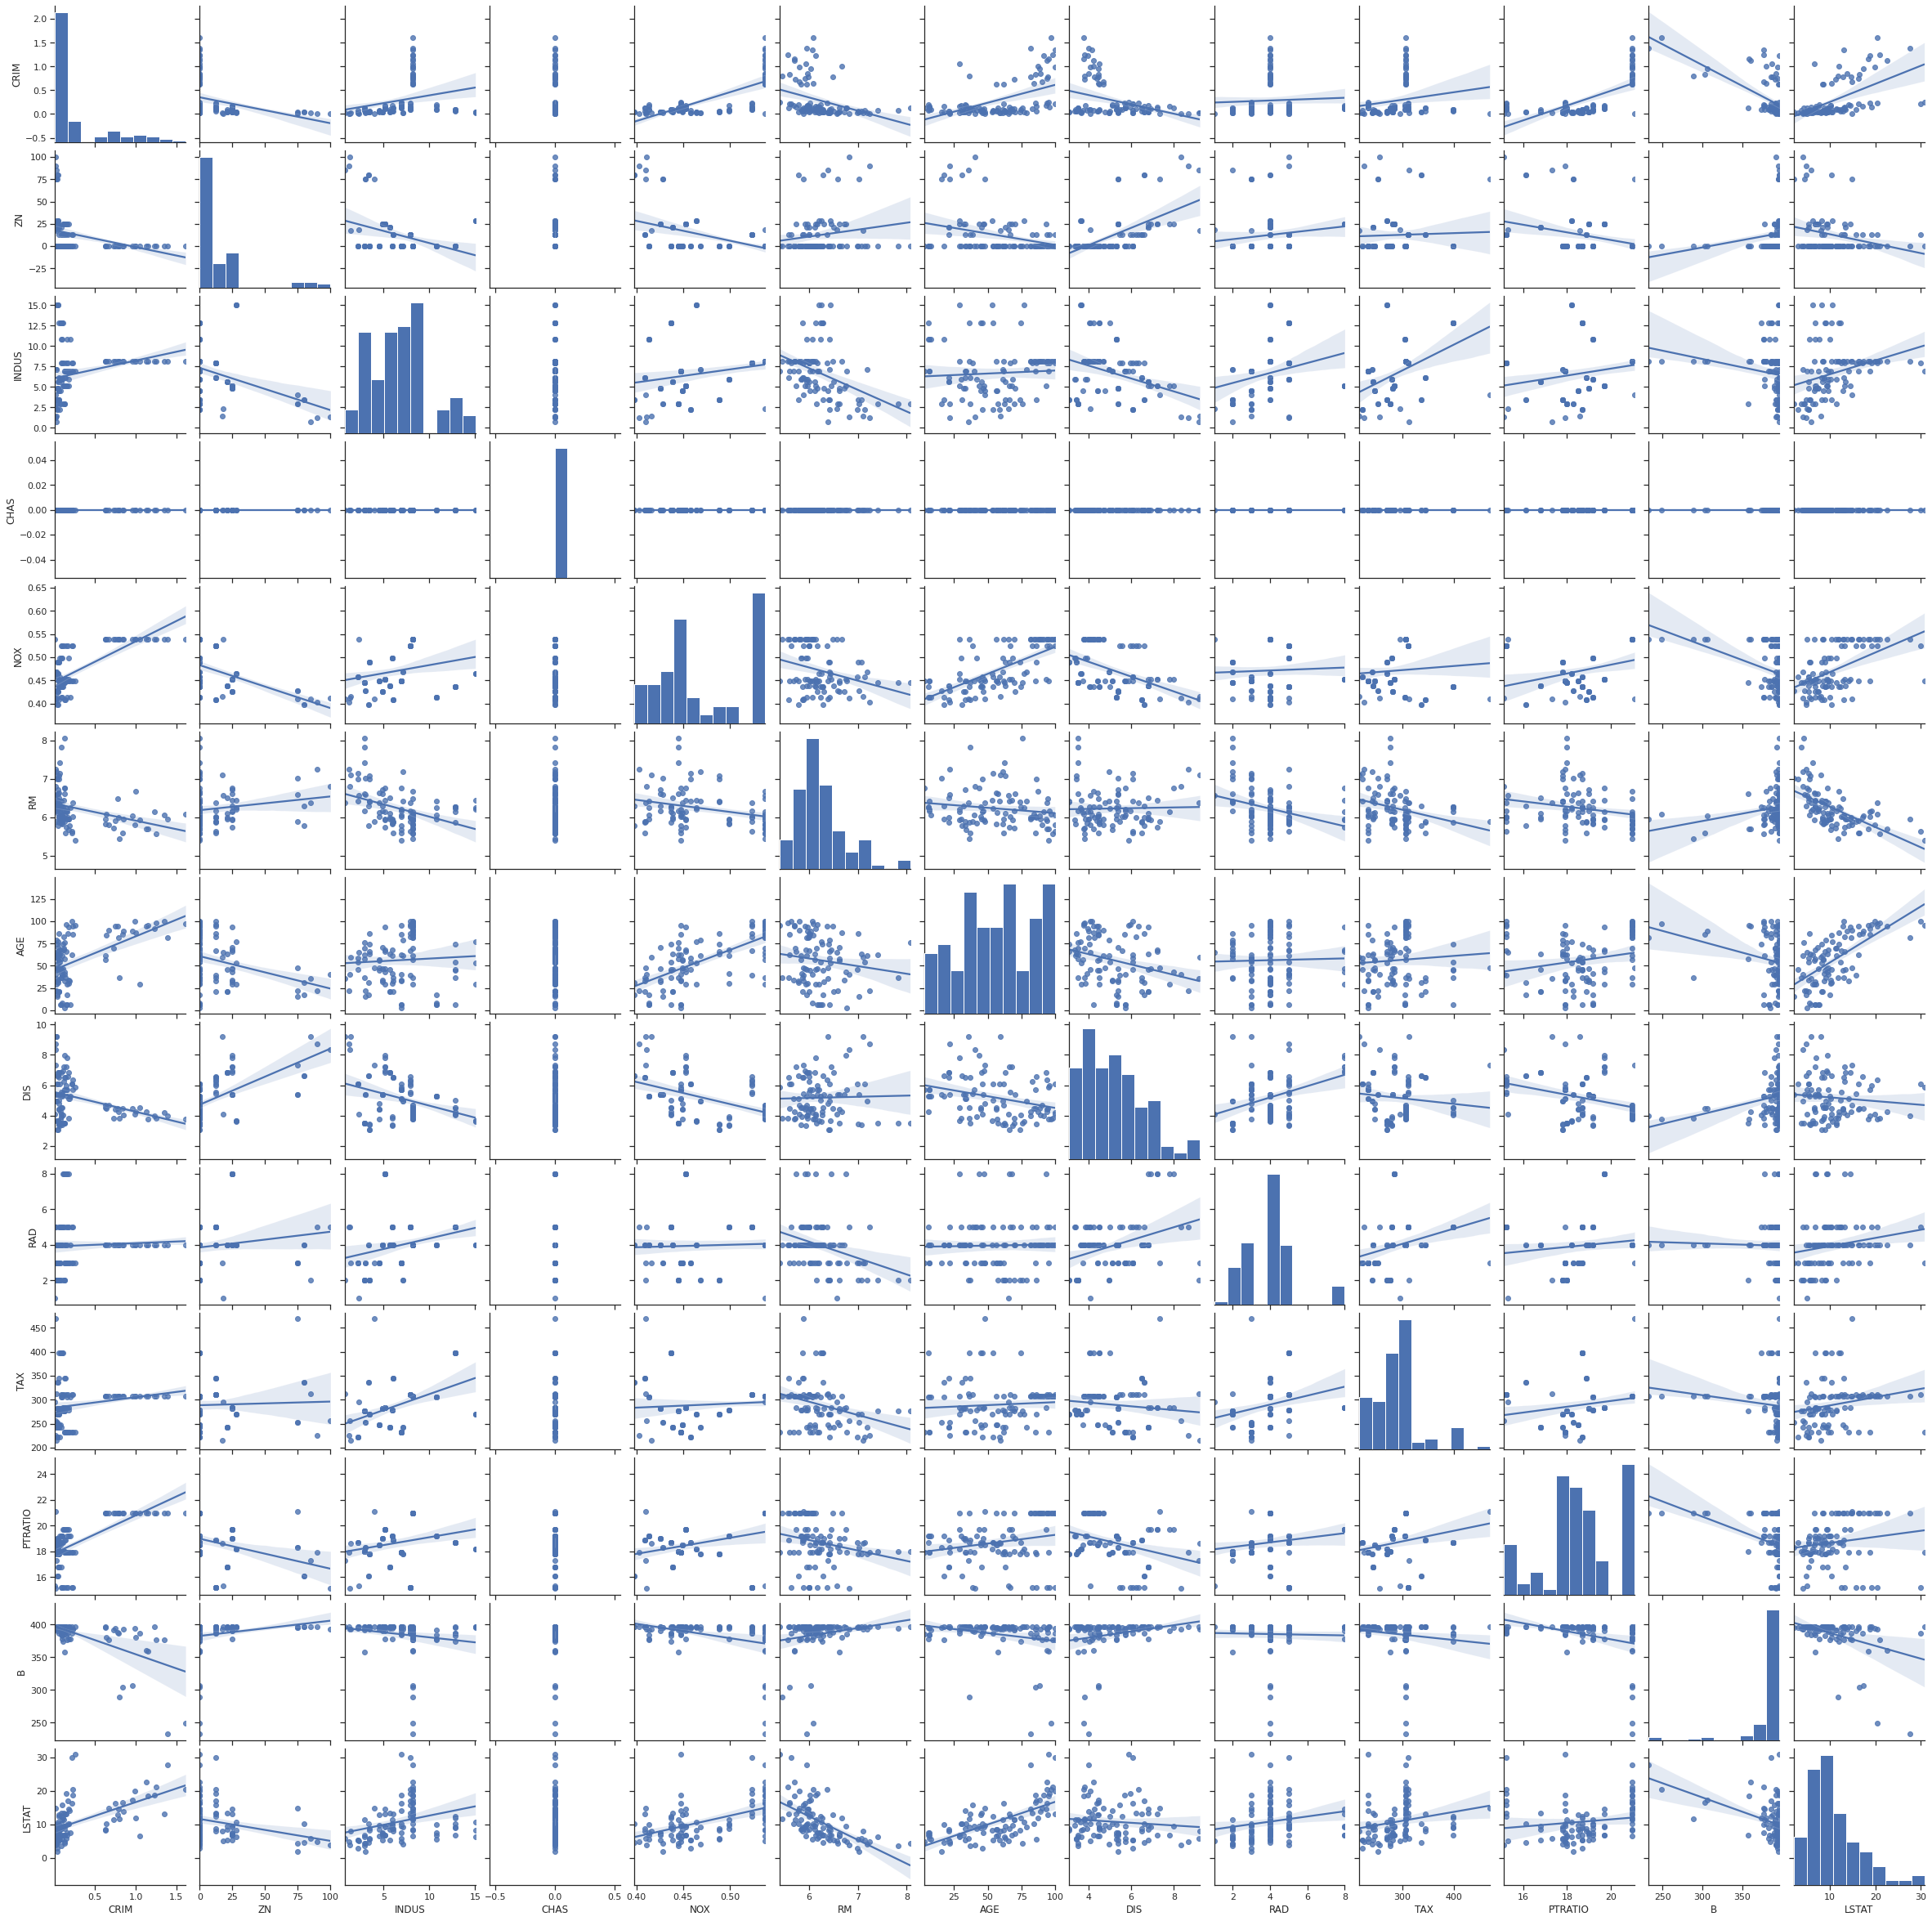

CPU times: user 59 s, sys: 190 ms, total: 59.2 s
Wall time: 59.1 s


In [70]:
# Make a paiwise scatter plot.
%%time
sns.set(style="ticks", color_codes=True)
sns.pairplot(df[:100], kind="reg") # To save time, consider 100 rows only.
plt.show()

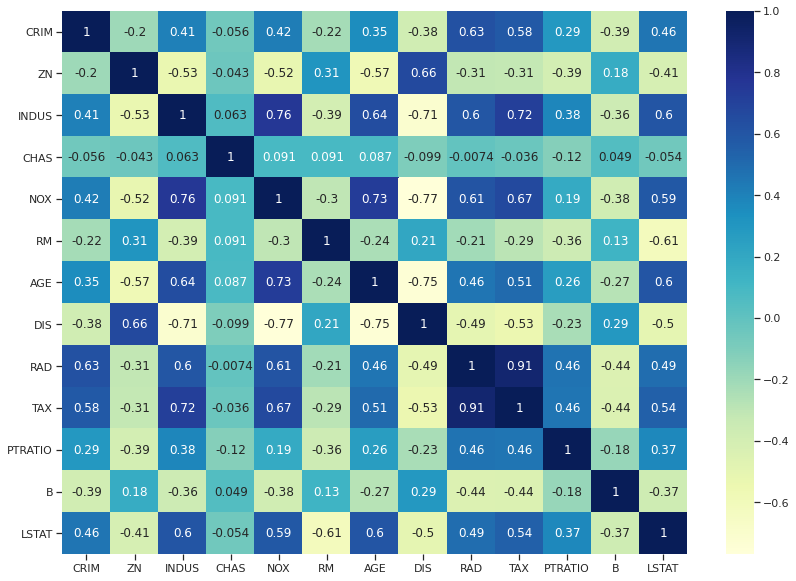

In [71]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)
plt.show()

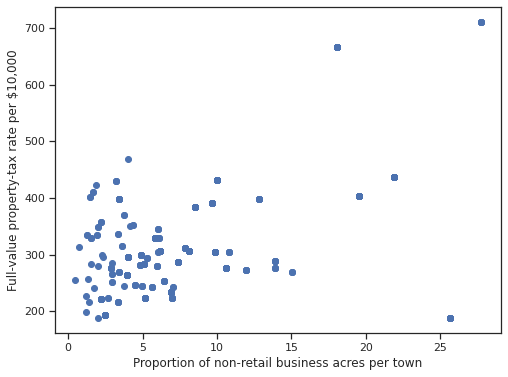

In [72]:
plt.figure(figsize=(8, 6))
plt.scatter(df['INDUS'], df['TAX'])
plt.xlabel('Proportion of non-retail business acres per town')
plt.ylabel('Full-value property-tax rate per $10,000')
plt.show()

In [73]:
# Calculate z-score
z = np.abs(stats.zscore(df))

In [74]:
type(z)

numpy.ndarray

In [75]:
threshold = 3
print(np.where(z > threshold))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466]), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11]

In [76]:
# Remove the outliers from the dataset using z-score.
df_in = df[(z < threshold).all(axis=1)]

In [77]:
print(df.shape, df_in.shape)

(506, 13) (415, 13)


In [78]:
# Calculate IQR Score to filter out the outliers by keeping only valid values.
Q1 = df_in.quantile(0.25)
Q3 = df_in.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM         2.07111
ZN          12.50000
INDUS       12.97000
CHAS         0.00000
NOX          0.16000
RM           0.67350
AGE         50.15000
DIS          3.08410
RAD          4.00000
TAX        158.00000
PTRATIO      2.80000
B           19.02000
LSTAT        9.00500
dtype: float64


In [79]:
# Remove the outliers from the dataset using IQR.
df_in_in = df_in[~((df_in < (Q1 - 1.5 * IQR)) |(df_in > (Q3 + 1.5 * IQR))).any(axis=1)]

In [80]:
print(df.shape, df_in.shape, df_in_in.shape)

(506, 13) (415, 13) (222, 13)
